# Exercise 11-1: Create a multiple regression

## Import the data

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
fish = pd.read_csv('Fish.csv')


In [3]:
fish.head()


,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


## Clean the data

In [4]:
# Task 4 - read the info.txt file 

fish.info(memory_usage = 'deep')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 17.2 KB


In [5]:
# Task 5 - rename the Length columns so they're more descriptive
fish.rename(columns = {'Length1': 'VerticalLength',
           'Length2': 'DiagonalLength',
           'Length3': 'CrossLength'}, inplace = True)


## Identify a correlation

In [6]:
# Task 6 -get the correlation data for the Weight column

fish.corr()[['Weight']]

,Weight
Weight,1.000000
VerticalLength,0.915712
DiagonalLength,0.918618
CrossLength,0.923044
Height,0.724345
Width,0.886507


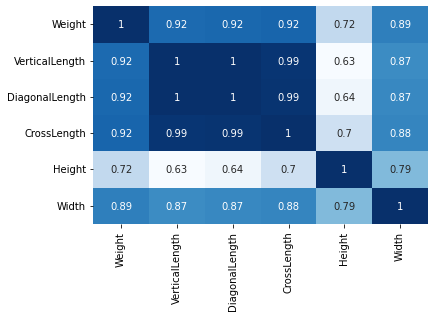

In [7]:
# Task 7 - create a heatmap for the correlation data

sns.heatmap(data = fish.corr(), annot = True, cmap = 'Blues', cbar = False);

## Create a multiple regression model

In [8]:
# Task 9 - filter the data so it only contains the values for the Bream species 
#            and assign the resulting DataFrame to a variable named bream
# Only do the regression model on 1 Species.

bream = fish.query('Species == "Bream"')


In [9]:
# Task 8 - use the correlation data to choose 3 independent variables,
#            the first 2 should b Height and Width, the 3rd should be
#            one of the length columns.


In [10]:
# Task 10  split the training and test data 

x_train, x_test, y_train, y_test = train_test_split(bream[['Height', 'Width', 'VerticalLength']],
                                                   bream[['Weight']], test_size = 0.2, random_state = 42)


In [11]:
# Task 11 - create the model and fit the training data

model = LinearRegression()

model.fit(x_train, y_train)


LinearRegression()

In [12]:
# Task 12 - score the testing data

model.score(x_test, y_test)


0.8056838961549181

In [13]:
# Task 13 - make the predictions and store the results in a DataFrame

y_predicted = model.predict(x_test)

predict = pd.DataFrame(data = y_predicted, columns = ['predictedWeight']) 


In [14]:
# Task 14 - join the predicted data with the original data in a DataFrame named final

final = predict.join([x_test.reset_index(drop = True),
                     y_test.reset_index(drop = True)])

final.head()


,predictedWeight,Height,Width,VerticalLength,Weight
0,743.957917,16.3618,6.0900,32.0,720.0
1,528.466127,13.9129,5.0728,29.5,340.0
2,711.983163,16.2405,5.5890,31.9,700.0
3,679.404856,15.9936,5.3704,31.4,685.0
4,621.560248,15.4380,5.5800,29.4,600.0


## Plot the residuals

In [15]:
# Task 15 - calculate the residuals and store them in a column in the DataFrame

final['residual'] = final.Weight - final.predictedWeight

final.head()


,predictedWeight,Height,Width,VerticalLength,Weight,residual
0,743.957917,16.3618,6.0900,32.0,720.0,-23.957917
1,528.466127,13.9129,5.0728,29.5,340.0,-188.466127
2,711.983163,16.2405,5.5890,31.9,700.0,-11.983163
3,679.404856,15.9936,5.3704,31.4,685.0,5.595144
4,621.560248,15.4380,5.5800,29.4,600.0,-21.560248


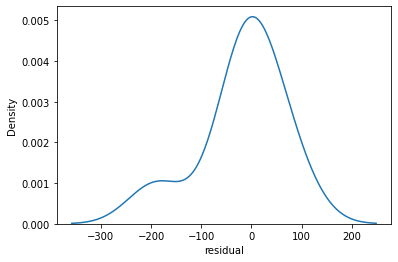

In [16]:
# Task 16 - create a KDE plot for the residuals
#             Note: whether the provides a bell-shaped curve centered on 0.

sns.kdeplot(data = final, x = 'residual');
